In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df1=pd.read_csv('Dataset1_Syria Archive.csv',header=None,names=['URL','title','summary','date','time','location','weapon','collection','violation'])
df2 = pd.read_csv('Dataset2_Violations Documentation Center in Syria.csv', header=None, names=['name', 'status', 'sex', 'province', 'area','date', 'cause of death','actors'])

In [3]:
df1[:2]

,URL,title,summary,date,time,location,weapon,collection,violation
0,https://syrianarchive.org/en/database?after=20...,Russian aircrafts commit a massacre in Kafar H...,Russian aircrafts commit a massacre in Kafar H...,2016-02-27,3:16:24,ALEPPO : Kafr hamrah,NaN,Civilian casualties as a result of alleged rus...,Unlawful attacks
1,https://syrianarchive.org/en/database?after=20...,#Witness: 8 killed by Russian airstrikes on th...,#Witness: 8 killed by Russian airstrikes on th...,2016-02-27,6:03:25,ALEPPO : Kafr hamrah,NaN,Civilian casualties as a result of alleged rus...,Unlawful attacks


In [4]:
df2

,name,status,sex,province,area,date,cause of death,actors
0,Abdulla Riyad Hammash,Non-Civilian,Adult - Male,Idlib,Jisr Shagour: Najieh,2016-02-26,Shooting,NaN
1,Muhannad Abo Wiliam,Non-Civilian,Adult - Male,Damascus Suburbs,Daraya,2016-02-26,Shooting,NaN
2,Atia al-Daher al-Khateeb,Civilian,Adult - Female,Homs,Telbeiseh,2016-02-26,Warplane shelling,NaN
3,Unidentified,Civilian,Adult - Male,Damascus Suburbs,Hazza,2016-02-26,Shelling,NaN
4,Ismael Haj Yousef,Civilian,Adult - Male,Damascus Suburbs,Erbeen,2016-02-26,Warplane shelling,NaN
5,Mohammad Subhi Siwar,Civilian,Adult - Male,Damascus Suburbs,Dumair,2016-02-26,Shooting,Not identified
6,Abo Obada al-Homsi,Non-Civilian,Adult - Male,Homs,Waar,2016-02-26,Shooting,NaN
7,Abo Baker,Non-Civilian,Adult - Male,Homs,Waar,2016-02-26,Shooting,NaN
8,Mohammad Anwar Koraj,Non-Civilian,Adult - Male,Aleppo,Anadan,2016-02-26,Shooting,NaN
9,Ahmad Faraj al-Ibraheem,Non-Civilian,Adult - Male,Deir Ezzor,NaN,2016-02-26,Shooting,NaN


In [5]:
df2['actors'].value_counts()

Syrian government and affiliated militias                              15580
Russian troops                                                          3808
The organization of the Islamic State in Iraq and the Levant - ISIS     3102
Not identified                                                          2696
International coalition forces                                          2059
Armed opposition groups                                                 1634
Self administration forces                                               582
Al-Nusra Front                                                           112
Name: actors, dtype: int64

# Part 1 Data Analysis

## Clean and analyse locations in the first dataset from Syrian Archive

In [28]:
def clean_location(r):
    return str(r).split(':')[0]
df1['location_clean']=df1['location'].apply(clean_location)
df1['location_clean'].apply(str).value_counts()

ALEPPO       1920
IDLIB         219
HAMA          103
DAMASCUS       97
nan            41
HOMS           39
DARAA           9
LATTAKIA        2
حلب             1
Name: location_clean, dtype: int64

In [7]:
#replace "حلب" with "missing value"
df_media_location=pd.DataFrame({'location':['Aleppo','Idlib','Hama','Damascus','NaN','Homs','Daraa','Lattakia','missing value'],'number':[1920,219,103,97,41,39,9,2,1]})
#calculate the distribution of locations
total=0
percentage=[]
for i in df_media_location['number']:
    total=total+i
for i in df_media_location['number']:
    percentage.append(i/total)
df_media_location['percentage']=pd.Series(percentage)

## Clean and analyse death causes in the first dataset from Syrian Archive

In [33]:
death_cause=df1['collection'].value_counts()
death_cause

Civilian casualties as a result of alleged russian attacks                               230
Chemical weapons                                                                         139
Attacks against hospitals                                                                 92
Chemical Weapons                                                                          11
Attacks against schools                                                                    9
Attacks against hospitals, Chemical weapons                                                8
Attacks against humanitarian relief personnel and objects                                  5
Civilian casualties as a result of alleged russian attacks, Attacks against hospitals      3
Attacks against hospitals, Attacks against humanitarian relief personnel and objects       2
Attacks against bakeries                                                                   1
Attacks against journalists                                           

In [34]:
death_cause_media=pd.DataFrame({'cause':['Civilian casualties as a result of alleged russian attacks',
                                         'Chemical weapons','Attacks against hospitals',
                                            'Attacks against schools',
                                            'Attacks against humanitarian relief personnel and objects',
                                            "Attacks against bakeries",
                                            "Attacks against journalists"],
                                'number':[233,158,105,9,7,1,1]})
#calculate the distribution of locations
total=0
percentage=[]
for i in death_cause_media['number']:
    total=total+i
for i in death_cause_media['number']:
    percentage.append(i/total)
death_cause_media['percentage']=pd.Series(percentage)
death_cause_media

,cause,number,percentage
0,Civilian casualties as a result of alleged rus...,233,0.453307
1,Chemical weapons,158,0.307393
2,Attacks against hospitals,105,0.204280
3,Attacks against schools,9,0.017510
4,Attacks against humanitarian relief personnel ...,7,0.013619
5,Attacks against bakeries,1,0.001946
6,Attacks against journalists,1,0.001946


## Clean and analyse locations in the second dataset from Violation Documentation Center in Syria

In [29]:
df_fact_location=df2['province'].value_counts().to_frame()
df_fact_location=df_fact_location.reset_index()
df_fact_location.columns=['location','number']
total=0
percentage=[]
for i in df_fact_location['number']:
    total=total+i
for i in df_fact_location['number']:
    percentage.append(i/total)
df_fact_location['percentage']=pd.Series(percentage)
df_fact_location


,location,number,percentage
0,Aleppo,7990,0.260660
1,Damascus Suburbs,6372,0.207875
2,Idlib,4434,0.144651
3,Deir Ezzor,2904,0.094738
4,Homs,2304,0.075164
5,Daraa,2231,0.072782
6,Hama,1856,0.060549
7,Raqqa,1327,0.043291
8,Damascus,601,0.019607
9,Other Nationalities,139,0.004535


In [30]:
#As shown above, "Damascus Suburbs" can be merged into "Damascus".
df_fact_location['number'][8]=df_fact_location['number'][8]+df_fact_location['number'][1]
df_fact_location['percentage'][8]=df_fact_location['percentage'][8]+df_fact_location['percentage'][1]
df_fact_location=df_fact_location.drop(1)

/Users/p17417864/Desktop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/p17417864/Desktop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Clean and analyse death causes in the second dataset from Violation Documentation Center in Syria

In [18]:
df2['cause of death'].value_counts()

Warplane shelling                   12926
Shooting                             8348
Shelling                             4789
Explosion                            2353
Field Execution                       487
Detention - Torture                   465
Kidnapping - Execution                387
Unknown                               257
Chemical and toxic gases              226
Other                                 120
Detention - Execution                 117
Siege                                  93
Un-allowed to seek Medical help        39
Kidnapping - Torture                   31
Kidnapping - Torture - Execution        9
Detention - Torture - Execution         6
Name: cause of death, dtype: int64

Merge "Detention - Torture", "Kidnapping - Execution", "Detention - Execution", "Kidnapping - Torture", "Kidnapping - Torture - Execution" ,"Detention - Torture - Execution" into "mixed" 

In [59]:
death_cause_fact=pd.DataFrame({'cause':['Warplane shelling', 
                                        'Shooting', 
                                        'Shelling', 
                                        'Explosion',
                                        'Field Execution', 
                                        'Unknown', 
                                        'Chemical and toxic gases', 
                                        'Other', 
                                        'Siege',
                                        'Un-allowed to seek Medical help',
                                       'mixed'],
                                'number':[12926,8348,4789,2353,487,257,226,120,93,39,1015]})

In [60]:
total=0
percentage=[]
for i in death_cause_fact['number']:
    total=total+i
for i in death_cause_fact['number']:
    percentage.append(i/total)
death_cause_fact['percentage']=pd.Series(percentage)
death_cause_fact


,cause,number,percentage
0,Warplane shelling,12926,0.421688
1,Shooting,8348,0.272339
2,Shelling,4789,0.156233
3,Explosion,2353,0.076762
4,Field Execution,487,0.015888
5,Unknown,257,0.008384
6,Chemical and toxic gases,226,0.007373
7,Other,120,0.003915
8,Siege,93,0.003034
9,Un-allowed to seek Medical help,39,0.001272


## Analyse casualties of civilian and non-civilian caused by different actors

In [67]:
emmm1=df2['actors'].value_counts()
emmm2=emmm1.drop('Not identified')
emmm3=emmm2.drop('Self administration forces')
emmm=emmm3.drop('Al-Nusra Front')

Apart from "Not identified", we chose to casualties of civilian and non-civilian caused by top 5 actors, namely "Syrian government and affiliated militias", "Russian troops", "ISIS", "International coalition forces", "Armed opposition groups".

In [68]:
df2[df2['actors']=='Syrian government and affiliated militias']['status'].value_counts()

Civilian        10324
Non-Civilian     5256
Name: status, dtype: int64

In [69]:
df2[df2['actors']=='Russian troops']['status'].value_counts()

Civilian        3651
Non-Civilian     157
Name: status, dtype: int64

In [70]:
df2[df2['actors']=='The organization of the Islamic State in Iraq and the Levant - ISIS']['status'].value_counts()

Civilian        1950
Non-Civilian    1152
Name: status, dtype: int64

In [71]:
df2[df2['actors']=='International coalition forces']['status'].value_counts()

Civilian        1905
Non-Civilian     154
Name: status, dtype: int64

In [72]:
df2[df2['actors']=='Armed opposition groups']['status'].value_counts()

Civilian        821
Non-Civilian    813
Name: status, dtype: int64

In [73]:
actors_status=pd.DataFrame({'actors':['Syrian government and affiliated militias', 
                                        'Syrian government and affiliated militias', 
                                        'Russian troops', 
                                        'Russian troops',
                                        'ISIS', 
                                        'ISIS', 
                                        'International coalition forces', 
                                        'International coalition forces', 
                                        'Armed opposition groups',
                                       'Armed opposition groups'],
                               'status':['Civilian','Non-Civilian',
                                        'Civilian','Non-Civilian',
                                        'Civilian','Non-Civilian',
                                        'Civilian','Non-Civilian',
                                        'Civilian','Non-Civilian'],
                                'number':[10324,5256,3651,157,1950,1152,1905,154,821,813]})

In [74]:
percentage=[]
for i in range(5):
    percentage.append(actors_status['number'][2*i]/emmm.values[i])
    percentage.append(actors_status['number'][2*i+1]/emmm.values[i])
actors_status['percentage']=pd.Series(percentage)

# Part 2 Data Visualisation

## Comparing location distribution in two datasets

In [31]:
df_fact_location=df_fact_location.sort_values(by='percentage',ascending=True)[7:15]
df_fact_location

,location,number,percentage
7,Raqqa,1327,0.043291
6,Hama,1856,0.060549
5,Daraa,2231,0.072782
4,Homs,2304,0.075164
3,Deir Ezzor,2904,0.094738
2,Idlib,4434,0.144651
8,Damascus,6973,0.227482
0,Aleppo,7990,0.260660


(0, 1)

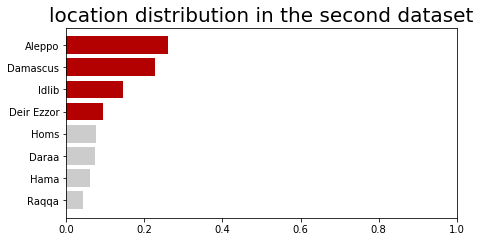

In [126]:
fig=plt.figure(figsize=(7,3.5))
plt.barh(df_fact_location['location'].values,df_fact_location['percentage'].apply(float).values,
        color=['#cccccc','#cccccc','#cccccc','#cccccc','#b30000','#b30000','#b30000','#b30000'])
plt.title('location distribution in the second dataset',fontsize=20)
plt.xlim(range(2))
plt.savefig('location_fact.png')

(0, 1)

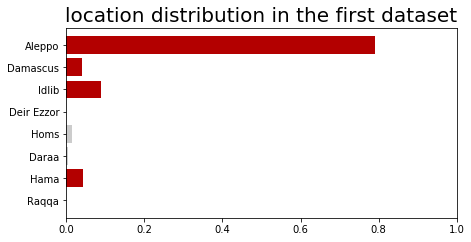

In [127]:
fig=plt.figure(figsize=(7,3.5))
plt.barh(df_fact_location['location'].values,[0,0.042369,0.003702,0.016043,0,0.090086,0.039901,0.789798],
         color=['#cccccc','#b30000','#cccccc','#cccccc','#cccccc','#b30000','#b30000','#b30000'])
plt.title('location distribution in the first dataset',fontsize=20)
plt.xlim(range(2))
plt.savefig('location_media.png')

Use photoshop to refine the two graphs, then we get:

<img src="https://ws1.sinaimg.cn/large/0067b1PEgy1fqzwyb9qulj30pe0dddjc.jpg" width="80%" height="80%">

## Compare and Visualize death causes in two datasets

In [26]:
death_cause_fact

,cause,number,percentage
0,Warplane shelling,12926,0.421688
1,Shooting,8348,0.272339
2,Shelling,4789,0.156233
3,Explosion,2353,0.076762
4,Field Execution,487,0.015888
5,Unknown,257,0.008384
6,Chemical and toxic gases,226,0.007373
7,Other,120,0.003915
8,Siege,93,0.003034
9,Un-allowed to seek Medical help,39,0.001272


In [114]:
death_cause_media

,cause,number,percentage
0,Civilian casualties as a result of alleged rus...,233,0.453307
1,Chemical weapons,158,0.307393
2,Attacks against hospitals,105,0.204280
3,Attacks against schools,9,0.017510
4,Attacks against humanitarian relief personnel ...,7,0.013619
5,Attacks against bakeries,1,0.001946
6,Attacks against journalists,1,0.001946


Use R Language and Photopshop to visualize the results:

<img src="https://ws1.sinaimg.cn/large/0067b1PEgy1fr02ckwtfwj315h11ijyr.jpg" width="70%" height="70%">

## Visualize casualties of civilian and non-civilian caused by different actors

In [75]:
actors_status

,actors,number,status,percentage
0,Syrian government and affiliated militias,10324,Civilian,0.662644
1,Syrian government and affiliated militias,5256,Non-Civilian,0.337356
2,Russian troops,3651,Civilian,0.958771
3,Russian troops,157,Non-Civilian,0.041229
4,ISIS,1950,Civilian,0.628627
5,ISIS,1152,Non-Civilian,0.371373
6,International coalition forces,1905,Civilian,0.925206
7,International coalition forces,154,Non-Civilian,0.074794
8,Armed opposition groups,821,Civilian,0.502448
9,Armed opposition groups,813,Non-Civilian,0.497552


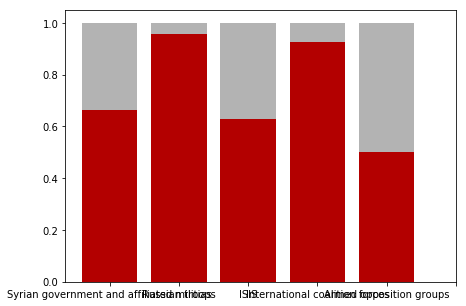

In [76]:
fig=plt.figure(figsize=(7,5))
d=np.arange(5)
y1=actors_status['percentage'][d*2]
plt.bar(d,y1,label='Civilian',color='#b30000')
plt.bar(d,actors_status['percentage'][d*2+1],bottom=y1,label='Non Civilian',color='#b3b3b3')
plt.xticks(range(6),actors_status['actors'][d*2])
plt.savefig('russia_citizen.png')

Use photoshop to refine the graph, then we get:

<img src="https://ws1.sinaimg.cn/large/0067b1PEgy1fqzyd8ppmoj30s00k0acf.jpg" width="70%" height="70%">

## Visualize the location distribution of casualties caused by Russian troops

In [112]:
df2[df2['actors']=='Russian troops']['province'].value_counts()

Aleppo              1554
Idlib                754
Deir Ezzor           639
Hama                 343
Damascus Suburbs     258
Homs                 129
Raqqa                 91
Daraa                 30
Damascus               8
Lattakia               2
Name: province, dtype: int64

Use photoshop to visualize the results, then we get:

<img src="https://ws1.sinaimg.cn/large/0067b1PEgy1fqzyetk2obj32bc290qg7.jpg" width="60%" height="60%">

## Other aspects mentioned in the story

In [58]:
df1[df1['collection']=='Civilian casualties as a result of alleged russian attacks']['violation'].value_counts()

Unlawful attacks          220
Use of illegal weapons     10
Name: violation, dtype: int64